In [219]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy.stats as stats
import math
"Hi this is new branch"

In [220]:
%autosave 0

Autosave disabled


In [221]:
HDFC_1m = yf.download('HDFCBANK.NS',
                      period='7d',progress=False,
                     interval ='1m'
)

In [222]:
HDFC_5m = yf.download('HDFCBANK.NS',
                      period='60d',
                      progress=False,interval ='5m'
)

In [223]:
HDFC_15m = yf.download('HDFCBANK.NS',
                      period='60d',
                      progress=False,interval ='15m'
)

In [224]:
HDFC_1h = yf.download('HDFCBANK.NS',
                      period='730d',
                      progress=False,interval ='1h'
)

In [225]:
Duration = '1y'
HDFC_1d = yf.download('HDFCBANK.NS',
                      period=Duration,
                      progress=False,interval ='1d'
)
HDFC_1d.head() #Fix the Time Period for the data of interval of 1-Day

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-12,1612.550049,1615.800049,1599.449951,1600.800049,1579.234863,6704146
2023-06-13,1590.099976,1609.000000,1590.099976,1603.500000,1581.898438,13963054
2023-06-14,1610.449951,1612.000000,1600.199951,1601.750000,1580.171997,10056984
2023-06-15,1604.000000,1605.949951,1579.000000,1582.050049,1560.737427,17688738
2023-06-16,1587.150024,1609.199951,1584.000000,1602.750000,1581.158569,7889636


In [226]:
HDFC_1d_SD = statistics.stdev(HDFC_1d['Adj Close'])

In [227]:
HDFC_1h_SD = statistics.stdev(HDFC_1h['Adj Close'])

In [228]:
HDFC_15m_SD = statistics.stdev(HDFC_15m['Adj Close'])

In [229]:
HDFC_5m_SD = statistics.stdev(HDFC_5m['Adj Close'])

In [230]:
HDFC_1m_SD = statistics.stdev(HDFC_1m['Adj Close'])

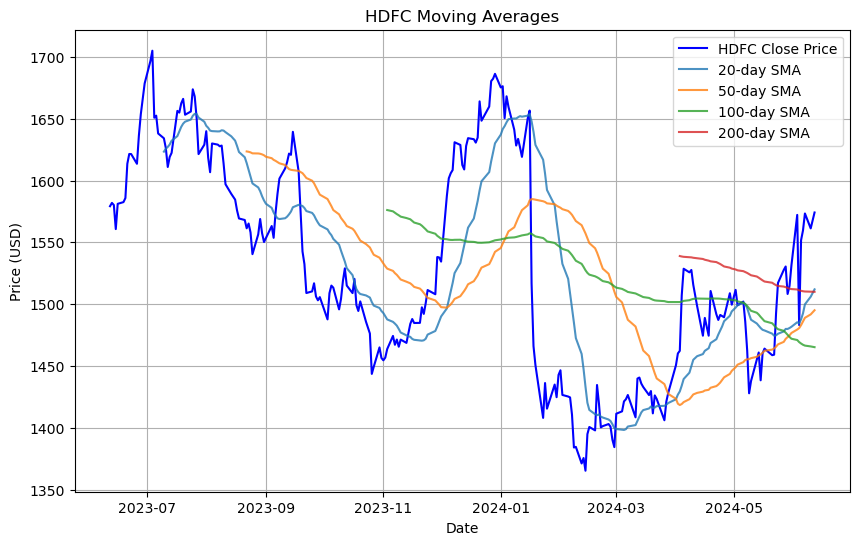

In [231]:
SMA = [20,50,100,200]
for i in SMA:
    HDFC_1d[f'SMA_{i}'] = HDFC_1d['Adj Close'].rolling(i).mean()
    
plt.figure(figsize=(10, 6))
plt.plot(HDFC_1d['Adj Close'], label='HDFC Close Price', color='blue')
for i in SMA:
    plt.plot(HDFC_1d[f'SMA_{i}'], label=f'{i}-day SMA', alpha=0.8)
plt.title('HDFC Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
Multiplier = k = 2 # Will be used in Bollinger Curves
SMA = [20,50,100,200]
for i in SMA:
    HDFC_1d[f'UBB_{i}'] = HDFC_1d[f'SMA_{i}'] + k*HDFC_1d_SD
    HDFC_1d[f'LBB_{i}'] = HDFC_1d[f'SMA_{i}'] - k*HDFC_1d_SD

HDFC_1d.tail(30)

,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_100,SMA_200,UBB_20,LBB_20,UBB_50,LBB_50,UBB_100,LBB_100,UBB_200,LBB_200
Date,,,,,,,,,,,,,,,,,,
2024-04-29,1515.000000,1534.449951,1506.550049,1529.500000,1508.895386,18046675,1490.642120,1443.653284,1503.774298,1529.540944,1662.277716,1319.006525,1615.288879,1272.017688,1675.409894,1332.138703,1701.176539,1357.905348
2024-04-30,1529.199951,1539.500000,1514.900024,1520.099976,1499.621948,26153691,1494.203485,1446.132429,1503.392511,1528.785262,1665.839081,1322.567890,1617.768025,1274.496834,1675.028106,1331.756916,1700.420858,1357.149667
2024-05-02,1522.000000,1537.000000,1520.349976,1532.250000,1511.608276,16737503,1497.249390,1449.056499,1503.164128,1528.081127,1668.884985,1325.613794,1620.692094,1277.420904,1674.799724,1331.528533,1699.716723,1356.445532
2024-05-03,1533.250000,1540.599976,1507.199951,1519.599976,1499.128662,15932621,1499.195312,1451.139058,1502.278225,1527.386611,1670.830908,1327.559717,1622.774653,1279.503462,1673.913821,1330.642630,1699.022206,1355.751015
2024-05-06,1522.000000,1534.500000,1517.150024,1522.650024,1502.137695,14396698,1501.185632,1453.166375,1501.281339,1526.726624,1672.821228,1329.550037,1624.801970,1281.530779,1672.916935,1329.645744,1698.362219,1355.091028
2024-05-07,1521.949951,1524.050049,1504.150024,1506.150024,1485.859985,14240301,1500.127582,1454.923384,1500.081227,1526.024955,1671.763177,1328.491986,1626.558979,1283.287788,1671.716822,1328.445631,1697.660551,1354.389360
2024-05-08,1495.949951,1496.949951,1480.349976,1482.650024,1462.676514,20843931,1496.827643,1455.482744,1498.623138,1525.283580,1668.463238,1325.192047,1627.118340,1283.847149,1670.258734,1326.987543,1696.919175,1353.647984
2024-05-09,1474.949951,1486.750000,1445.300049,1447.500000,1428.000000,23140639,1491.939392,1455.647493,1496.593849,1524.328620,1663.574988,1320.303797,1627.283088,1284.011897,1668.229444,1324.958253,1695.964215,1352.693025
2024-05-10,1439.000000,1451.949951,1426.800049,1437.900024,1437.900024,13638304,1487.449957,1456.396960,1494.685264,1523.406389,1659.085553,1315.814362,1628.032556,1284.761365,1666.320859,1323.049668,1695.041985,1351.770794


In [233]:
HDFC_1d['Change'] = HDFC_1d['Adj Close'] - HDFC_1d['Adj Close'].shift(1)

HDFC_1d['Gain'] = HDFC_1d['Change'].apply(lambda x: x if x > 0 else 0)
HDFC_1d['Loss'] = HDFC_1d['Change'].apply(lambda x: -x if x < 0 else 0)

HDFC_1d['Gain'].fillna(0, inplace=True)
HDFC_1d['Loss'].fillna(0, inplace=True)

HDFC_1d.head()


,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,SMA_100,SMA_200,...,LBB_20,UBB_50,LBB_50,UBB_100,LBB_100,UBB_200,LBB_200,Change,Gain,Loss
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-12,1612.550049,1615.800049,1599.449951,1600.800049,1579.234863,6704146,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00000
2023-06-13,1590.099976,1609.000000,1590.099976,1603.500000,1581.898438,13963054,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.663574,2.663574,0.00000
2023-06-14,1610.449951,1612.000000,1600.199951,1601.750000,1580.171997,10056984,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.726440,0.000000,1.72644
2023-06-15,1604.000000,1605.949951,1579.000000,1582.050049,1560.737427,17688738,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.434570,0.000000,19.43457
2023-06-16,1587.150024,1609.199951,1584.000000,1602.750000,1581.158569,7889636,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.421143,20.421143,0.00000


In [234]:
Time_Period = 14
HDFC_1d['Avg.Gain'] = HDFC_1d['Gain'].rolling(Time_Period, min_periods=1).mean() # Ask once how many min_periods to take
HDFC_1d['Avg.Loss'] = HDFC_1d['Loss'].rolling(Time_Period, min_periods=1).mean() # Ask once how many min_periods to take

In [235]:
HDFC_1d['RS'] =  HDFC_1d['Avg.Gain']/HDFC_1d['Avg.Loss']
HDFC_1d['RSI'] = 100 - 100/(1+HDFC_1d['RS'])
HDFC_1d['RSI']

Date
2023-06-12           NaN
2023-06-13    100.000000
2023-06-14     60.673470
2023-06-15     11.179940
2023-06-16     52.173889
                 ...    
2024-06-05     66.353949
2024-06-06     64.952651
2024-06-07     65.955911
2024-06-10     64.680624
2024-06-12     65.896857
Name: RSI, Length: 245, dtype: float64

In [246]:
HDFC_Indicators = pd.DataFrame()
for i in SMA:
    HDFC_Indicators['RSI'] = HDFC_1d['RSI']
    HDFC_Indicators[f'SMA_{i}'] = HDFC_1d[f'SMA_{i}']
    HDFC_Indicators[f'LBB_{i}'] = HDFC_1d[f'LBB_{i}']  
    HDFC_Indicators[f'UBB_{i}'] = HDFC_1d[f'UBB_{i}']

HDFC_Indicators

,RSI,SMA_20,LBB_20,UBB_20,SMA_50,LBB_50,UBB_50,SMA_100,LBB_100,UBB_100,SMA_200,LBB_200,UBB_200
Date,,,,,,,,,,,,,
2023-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-13,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,60.673470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-15,11.179940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-16,52.173889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,66.353949,1487.773822,1316.138227,1659.409417,1483.112454,1311.476858,1654.748049,1468.222283,1296.586687,1639.857878,1510.827241,1339.191645,1682.462836
2024-06-06,64.952651,1492.624994,1320.989398,1664.260589,1486.071018,1314.435423,1657.706614,1467.223900,1295.588305,1638.859496,1510.484414,1338.848819,1682.120010
2024-06-07,65.955911,1499.892493,1328.256897,1671.528088,1489.012546,1317.376951,1660.648142,1466.546992,1294.911397,1638.182588,1510.282101,1338.646505,1681.917696


In [ ]:
Nrows = len(HDFC_1d)
j = range(0,Nrows)
if HDFC_1d['Adj Close'] - HDFC_1d['Adj Close'].shift(1) > 0:
    HDFC_1d['Avg.Gain'] = HDFC_1d['Adj Close']-HDFC_1d['Adj Close'].shift(1)
elif HDFC_1d['Adj Close'] - HDFC_1d['Adj Close'].shift(1) < 0:
    HDFC_1d['Avg.Gain'] =(HDFC_1d['Adj Close']-HDFC_1d['Adj Close'].shift(1))
else:
    HDFC_1d['No_PL'] = 0
    
HDFC_1d.head()   The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().